<a href="https://colab.research.google.com/github/benjarojas/ADA-Informes/blob/main/Insertion_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento
**Entrada**: Secuencia de $n$ números: $ [ a_1 , a_2 , \ldots , a_n ] $

**Salida**: Permutación de la secuencia de entrada $ [ a_1' , a_2' , \ldots , a_n' ] $ tal que $ a_1' \leq a_2' \leq \ldots \leq a_n' $

El ordenamiento es uno de los problemas mas importantes y estudiados en ciencias de la computación, dado que el poder ordenar datos generalmente puede reducir la complejidad de un problema, por ejemplo, es aplicable directamente a algoritmos de búsqueda que requieran que los datos estén ordenados como la búsqueda binaria.

# 2. Insertion Sort


## 2.1 Implementación del algoritmo
El siguiente código muestra una implementación del algoritmo **Insertion Sort**:

In [ ]:
from termcolor import colored

def insertion_sort(a, verbose=False):
    R = 0  # Contador de retrocesos/comparaciones

    # Para cada elemento del arreglo: a[1 ... n]
    for i in range(1, len(a)):

        if(verbose):
            print(f"Ordenando: {colored(str(a[i]), 'magenta')}")
            print(*a[:i], str(colored(a[i], 'magenta')), *a[i+1:])
            already_sorted = True

        # Elemento que compararemos con los anteriores en cada iteración
        key = a[i]

        # Posición desde donde comenzaremos a comparar con key
        j = i - 1

        # Comparamos key con cada elemento anterior a[0...i-1] hasta encontrar uno mayor
        while j >= 0:
            if key < a[j]: # Elemento key esta desordenado
                already_sorted = False

                if(verbose):
                    print("Se mueve el", colored(str(a[j]), "red"), "a la derecha")
                    print(*a[:j], colored(str(a[j]), 'red'), *a[j+1:])

                a[j + 1] = a[j]  # Se mueve el elemento a[j] 1 posición a la derecha

                if(verbose):
                    print(*a[:j+1], colored(str(a[j+1]), 'red'), *a[j+2:])

                j -= 1  # Retrocedemos una posición
                R += 1  # Sumamos una comparación
            else: # Elemento key está ordenado
                R += 1
                break

        if(verbose and already_sorted):
            print("Se encuentra ordenado")

        if(verbose and a[j+1] != key):
            a[j + 1] = key
            print("Insertamos", colored(str(key), "magenta"),
                  "en su nueva posición")
            print(*a[:j+1], colored(str(a[j + 1]), "magenta"), *a[j+2:])
            continue

        # Insertamos key (pivote) despues del elemento que es menor
        a[j + 1] = key

    if(verbose):
        print("Arreglo ordenado:", a)

    # Retornamos una tupla que contiene el arreglo ordenado y el contador de comparaciones.
    return a, R


arr = [4, 1, 2, 3, 5, 6, 7, 10, 8, 9]
print("Array original:", arr)
sorted_arr, C = insertion_sort(arr, verbose=False)
print("Array ordenado:", sorted_arr)

Array original: [4, 1, 2, 3, 5, 6, 7, 10, 8, 9]
Array ordenado: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## 2.2 Descripción del algoritmo
El algoritmo recibe como entrada un arreglo $a$ con la secuencia de $n$ elementos a ser ordenados.
Luego, los elementos son ordenados dentro del mismo arreglo.


1. Por cada iteración $i$, se compara el elemento $a_i$ con todos los elementos $[ a_0 \ldots a_{i-1} ]$, y si se encuentra un elemento $a_j$ mayor que el elemento $a_i$, el elemento $a_j$ se desplaza 1 posición a la derecha, quedando como el elemento $a_{j+1}$.
2. Luego, el algoritmo inserta el elemento $a_i$ en la posición $j$ cuando el elemento $a_{j-1}$ es menor a este. 
3. El algoritmo compara todos los elementos de arreglo.
4. Finalmente, el algoritmo retorna una tupla que contiene el arreglo ordenado y un contador de las comparaciones realizadas.

_**Nota**: cuando la variable `verbose` es `True`, el algoritmo muestra su ejecución paso a paso_


## 2.3 Ejemplo de ejecución
Consideremos el arreglo:

$a = [4,1,2,3]$

En la primera iteración, se toma el segundo elemento del arreglo $\{1\}$ y se compara con el elemento anterior $\{4\}$, y este al ser mayor es trasladado una posición a la derecha:

$a = [4,4,2,3]$

Al final de esta iteración, el elemento $\{1\}$ es insertado donde originalmente se encontraba el elemento $\{4\}$ de forma que los primeros 2 elementos del arreglo se encuentran ordenados:

$a = [1,4,2,3]$

En la segunda iteración se toma el elemento $\{2\}$ y se compara con su elemento antecesor $\{4\}$, que es mayor por lo que es desplazado una posición a la derecha:

$a = [1,4,4,3]$

Luego, se compara el elemento $\{2\}$ con el elemento anterior al $\{4\}$, pero no se intercambia dado que este es menor, por lo que se procede a insertar el elemento $\{2\}$:

$a = [1,2,4,3]$

En la última iteración, se toma el elemento $\{3\}$ y se compara con su elemento anterior, y al ser este mayor se traslada una posición a la derecha:

$a = [1,2,4,4]$

Finalmente, se compara el elemento $\{3\}$ con el elemento anterior al $\{4\}$ que sería $\{2\}$, pero al ser este menor, se procede a insertar el elemento $\{3\}$ quedando así el arreglo ordenado:

$a = [1,2,3,4]$

## 2.4 Ejecución paso a paso (`verbose = True`)

In [ ]:
from random import sample
a = sample(range(1, 100), 5)
a,R = insertion_sort(a, verbose=True)

Ordenando: 84
55 84 73 52 7
Se encuentra ordenado
Ordenando: 73
55 84 73 52 7
Se mueve el 84 a la derecha
55 84 73 52 7
55 84 84 52 7
Insertamos 73 en su nueva posición
55 73 84 52 7
Ordenando: 52
55 73 84 52 7
Se mueve el 84 a la derecha
55 73 84 52 7
55 73 84 84 7
Se mueve el 73 a la derecha
55 73 84 84 7
55 73 73 84 7
Se mueve el 55 a la derecha
55 73 73 84 7
55 55 73 84 7
Insertamos 52 en su nueva posición
52 55 73 84 7
Ordenando: 7
52 55 73 84 7
Se mueve el 84 a la derecha
52 55 73 84 7
52 55 73 84 84
Se mueve el 73 a la derecha
52 55 73 84 84
52 55 73 73 84
Se mueve el 55 a la derecha
52 55 73 73 84
52 55 55 73 84
Se mueve el 52 a la derecha
52 55 55 73 84
52 52 55 73 84
Insertamos 7 en su nueva posición
7 52 55 73 84
Arreglo ordenado: [7, 52, 55, 73, 84]


En cada iteración se recorre el arreglo los elementos en rojo son desplazados una posición a la derecha y finalmente es insertado el elemento a ordenar en su posición correspondente.

_**Nota:** Recordar que el proceso de imprimir por pantalla es **lento**, por lo que `verbose = True` podría **aumentar el tiempo de ejecución** del algoritmo_

# 3. Tiempo de ejecución

## **Teorema**
_El algoritmo **Insertion Sort** tiene un tiempo de ejecución de orden $O(n^2)$ en su peor caso_

## Prueba del teorema
Analizando el código, podemos observar que el **peor caso** ocurriría cuando el arreglo está ordenado de **mayor a menor**, ya que el algoritmo en la primera iteración debe hacer $0$ comparaciones, luego $1$ comparación, luego $2$ y así sucesivamente hasta alcanzar el $n$-ésimo elemento, donde se deben realizar $n-1$ comparaciones. Esto se puede reescribir como $0 + 1 + 2 + \ldots + n-1$ comparaciones.

### Ejemplo

In [ ]:
a = [5,4,3,2,1]
print("Entrada desordenada:", a)
a,comp = insertion_sort(a)
print("Salida ordenada:", a)
print("Comparaciones realizadas:", comp)

Entrada desordenada: [5, 4, 3, 2, 1]
Salida ordenada: [1, 2, 3, 4, 5]
Comparaciones realizadas: 10


En este caso, el algoritmo realizó $0$ comparaciones en la primera iteración, $1$ en la segunda, $2$ en la tercera, $3$ en la cuarta y $4$ en la quinta, lo que suma 10 comparaciones en total.

A partir de esto, podemos concluir que en el caso general se deben realizar $\sum\limits_{i=0}^{n-1} i=\frac{(n^2-n)}{2}$ comparaciones, quedando demostrado que **en el peor caso, el orden de complejidad del algoritmo Insertion Sort es $O(n^2)$.** $\blacksquare$

# 4. Correctitud
## **Teorema**
_El algoritmo Insertion Sort genera un arreglo $[a_1',a_2', \ldots ,a_n']$ mediante permutaciones de los mismos elementos de entrada, de tal forma que $a_1' \leq a_2' \leq \ldots \leq a_n'$_

## Prueba del Teorema
Anteriormente se mostró que por cada iteración $i$, el elemento $a_i$ es comparado con los primeros $i-1$ elementos del arreglo, y en caso de encontrarse un elemento $a_j$ menor, los elementos $[a_{j} \ldots a_{i-1}]$ serán desplazados una posición a la derecha, y el elemento $a_i$ será insertado donde se encontraba previamente $a_j$.

A partir de esto, probaremos la siguiente **propiedad invariante de bucle** para el algoritmo **Insertion Sort**:

> Al comienzo de cada iteración, los primeros $i-1$ elementos que corresponden a permutaciones de los elementos del arreglo original se encuentran ordenados de menor a mayor.

### Inicialización
Al comienzo de la primera iteración $(i = 1)$, los primeros $i - 1 = 0$ elementos del arreglo cumplen con el teorema. Esto es trivialmente cierto, puesto que por definición un único elemento siempre está ordenado.

### Mantención
Mediante inducción, podemos asumir que en cada iteración se cumple la **propiedad invariante de bucle**, es decir, el sub-arreglo $[ a_0 , \ldots , a_{i-1} ]$ está ordenado de tal forma que $a_0 \leq \ldots \leq a_{i-1}$

Por cada iteración, el sub-arreglo se expande, pero se mantiene ordenado, ya que cuando se inserta un elemento $\lambda$, se insertará luego del primer elemento $\leq \lambda$ y antes del primer elemento $\geq \lambda$, manteniendo el orden de menor a mayor y cumpliendose la propiedad.

### Correctitud

Ya que se demostró que la propiedad de bucle invariante se cumple al inicio del bucle y se mantiene en cada iteración, podemos decir que al **finalizar la $n$-ésima iteración del algoritmo Insertion Sort**, se genera un arreglo $[a_1',a_2',...,a_n']$, con los elementos iniciales del arreglo de entrada ordenados de menor a mayor. $\blacksquare$

# 5. Experimentos

## Experimento 1: Cantidad de Comparaciones
A continuación, se muestra un gráfico donde se compara el número de comparaciones realizadas por el algoritmo en los siguientes casos:

*   Mejor caso calculado matemáticamente.
*   Peor caso calculado matemáticamente.
*   Caso experimental con arreglos de entrada aleatorios donde el tamaño del problema $n \in [1,99]$

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre $1$ y $100$.



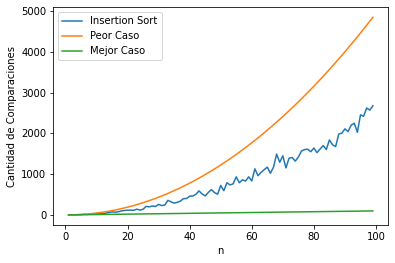

In [ ]:
import matplotlib.pyplot as plt

x=[n for n in range(1,100)] # Cantidad de elementos dentro del arreglo n en [1,99]
y1=[((n**2)-(n-1))/2 for n in range(1,100)] # Peor caso, donde se realizan (n^2 - n-1)/2 comparaciones
y2=[n-1 for n in range(1,100)] # Mejor caso, donde se realizan n-1 comparaciones
y=[]; 

# Caso experimental
for n in range(1,100):
    a = sample(range(1, 100), n)
    a,counter = insertion_sort(a)
    y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Insertion Sort", "Peor Caso", "Mejor Caso"])

plt.xlabel('n')
plt.ylabel('Cantidad de Comparaciones')
plt.show()

### Análisis de resultados

Como se puede observar en el gráfico, la curva de los casos aleatorios se mantiene en medio de las curvas de los casos extremos.

## Experimento 2: Arreglo casi completamente ordenado
En este experimento compararemos de una manera gráfica la cantidad de operaciones que debe realizar el algoritmo en el mejor caso y un caso donde el arreglo está parcialmente ordenado.

Para esto, se crearan arreglos con tamaños $n \in [5,39]$ donde sus 4 últimos elementos se encontrarán en orden inverso. De esta forma, un arreglo $a$ con $n = 10$ quedaría como $a = [1,2,3,4,5,6,10,9,8,7]$

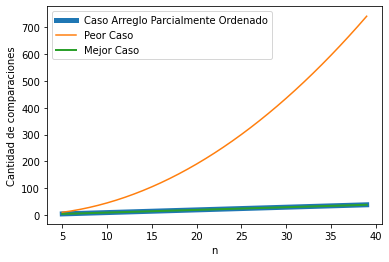

In [ ]:
x = [n for n in range(5,40)] # Cantidad de elementos dentro del arreglo n en [5,39]
y1 = [n*(n-1)/2 for n in range(5,40)] # Peor caso calculado matemáticamente
y2 = [n-1 for n in range(5,40)] # Mejor caso calculado matemáticamente
y = [];

# Arreglos parcialmente ordenados
for n in range(5,40):
    a=[]    
    for j in range(1,n-3): a.append(j) # Insertamos primeros elementos
    for k in range(n,n-4,-1): a.append(j) # Insertamos últimos 4 elementos en orden inverso
    sorted_arr, comp = insertion_sort(a) # Ordenamos el arreglo
    y.append(comp)

plt.plot(x,y, linewidth="5")
plt.plot(x,y1)
plt.plot(x,y2, linewidth="2")
plt.legend(["Caso Arreglo Parcialmente Ordenado", "Peor Caso", "Mejor Caso"])

plt.xlabel('n')
plt.ylabel('Cantidad de comparaciones')
plt.show()

### Análisis de resultados
Como se puede apreciar en el gráfico, cuando el arreglo se encuentra ordenado casi en su totalidad, su curva se acerca mucho a la del mejor caso, es decir, la diferencia entre la cantidad de comparaciones es mínima.

## Experimento 3: Comparación de tiempos de ejecución con Bubble Sort

En este experimento compararemos el tiempo de ejecución del algoritmo **Insertion Sort** con el algoritmo **Bubble Sort**.

In [ ]:
def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0 # Contador de comparaciones

    for i in range(1,n+1):
        # Flag que indica si el arreglo ya se encuentra ordenado
        already_sorted = True

        # Se recorre el arreglo
        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                # Si el elemento es mayor al siguiente se intercambia
                a[j], a[j + 1] = a[j + 1], a[j]
                already_sorted = False

        if already_sorted:
            break

    return a, T

A continuación, se realizará la comparación del rendimiento entre los 2 algoritmos con un tamaño de problema $n \in [5,499]$, donde los arreglos corresponderan a un sampleo de números aleatorios entre $1$ y $1000$

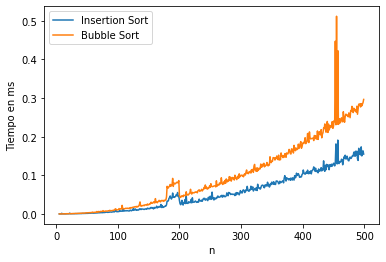

In [69]:
import datetime
import timeit

x,y,y1 = [],[],[]

for n in range(5,500):

  a = sample(range(1, 1000), n)

  insertion_T = timeit.repeat(setup="from __main__ import insertion_sort", stmt=f"insertion_sort({a})", repeat=1, number=10)
  bubble_T = timeit.repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)

  x.append(n)
  y.append(insertion_T)
  y1.append(bubble_T)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Insertion Sort", "Bubble Sort"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis de resultados

Como podemos apreciar en el gráfico, los 2 algoritmos se comportan de manera similar para tamaños de problema pequeños ($n \in [0,100]$), pero el algoritmo **Insertion Sort** presenta una ventaja notable en cuanto a eficiencia temporal para valores de $n$ grandes.

También podemos notar algunos peaks en la gráfica. Estos probablemente se deban al comportamiento impredecible del procesador.